## InSAR Data Processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scripts.insar_conversion import convert_insar_to_u

In [2]:
loc_asc = r'insar/sentinel1_asc_t088_limburg.csv'
loc_dsc = r'insar/sentinel1_dsc_t037_limburg.csv'

insar_asc_LOS = pd.read_csv(loc_asc, sep=',')
insar_dsc_LOS = pd.read_csv(loc_dsc, sep=',')

### Conversion from LOS to u

In [3]:
insar_asc_u = convert_insar_to_u(insar_asc_LOS)
insar_dsc_u = convert_insar_to_u(insar_dsc_LOS)

Dates + Displacement en some checks to verify the conversion functions works correctly:

In [4]:
# # Extract the dates from the .csv file
dates = pd.to_datetime(insar_asc_u.filter(regex='^u_20').columns, format='u_%Y%m%d')
dates_LOS = pd.to_datetime(insar_asc_LOS.filter(regex='^d_20').columns, format='d_%Y%m%d')

# # Check if dates are the same
print("The dates have the same shape:", dates.shape == dates_LOS.shape)
print("The dates are exactly equal:", np.array_equal(dates, dates_LOS))


# # Extract the displacement data from the .csv file
disp_asc_u = insar_asc_u.filter(regex='^u_20')
disp_asc_d = insar_asc_LOS.filter(regex='^d_20')

# # Check if displacement data shapes are the same after conversion
print("The displacement data have the same shape:", disp_asc_u.shape == disp_asc_d.shape)

# # Check in lon and lat are same
print(np.allclose(insar_asc_u['pnt_lon'].to_numpy(), insar_asc_LOS['pnt_lon'].to_numpy()))
print(np.allclose(insar_asc_u['pnt_lat'].to_numpy(), insar_asc_LOS['pnt_lat'].to_numpy()))
print('The lon and lat values are the same between the two dataframes.')

The dates have the same shape: True
The dates are exactly equal: True
The displacement data have the same shape: True
True
True
The lon and lat values are the same between the two dataframes.


In [5]:
# Calculate the nr of days between the observations where the first observations is day 0
days = (dates- dates[0]).days
years = days/365

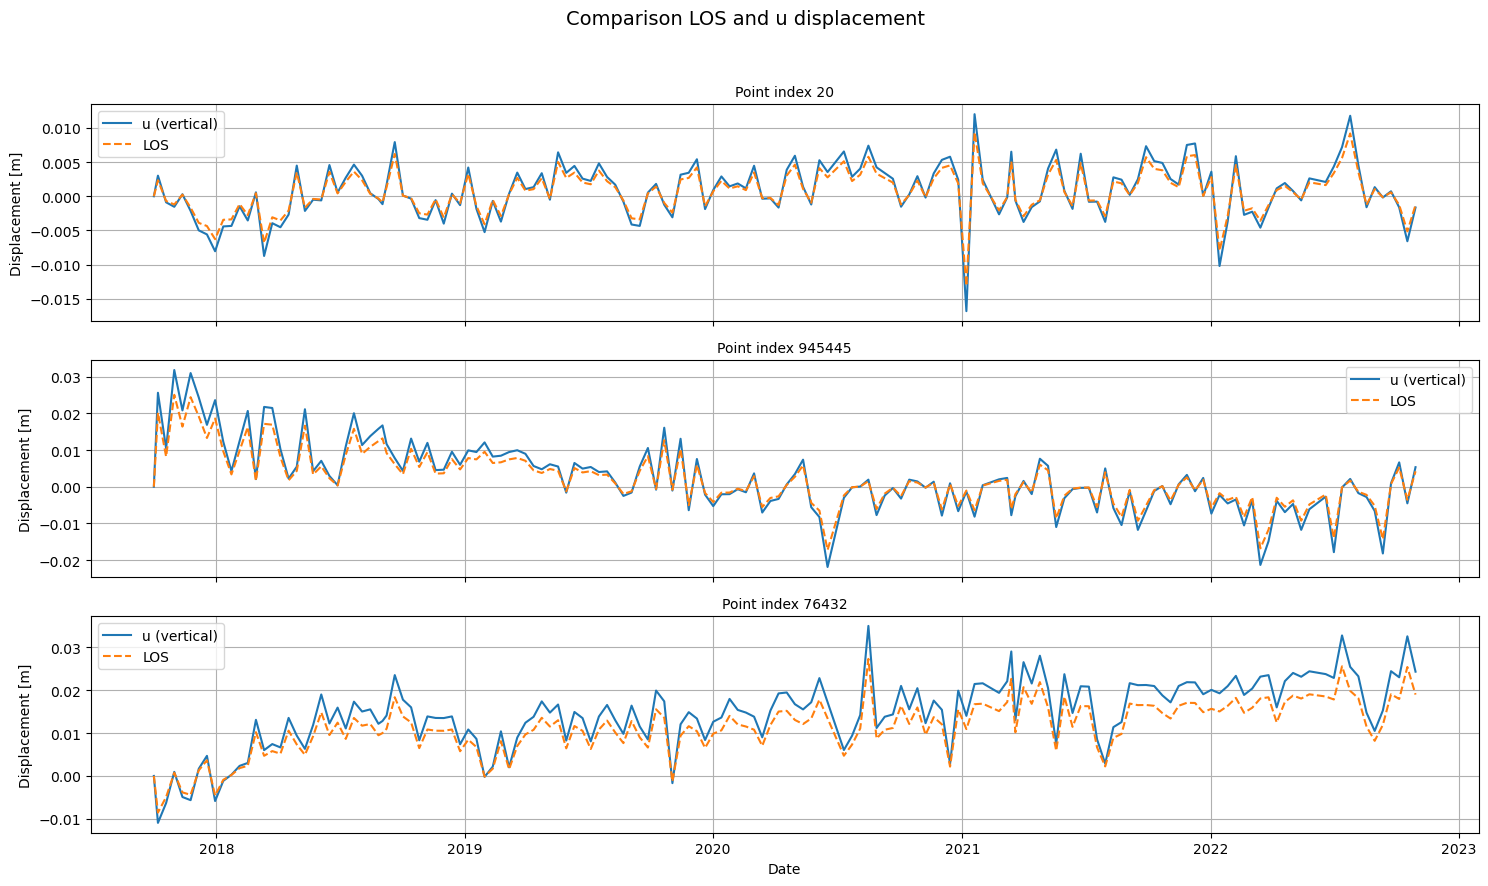

In [6]:
# Plot time series for three points
pnt_indices = [20, 945445, 76432]

fig, axes = plt.subplots(
    nrows=3,
    ncols=1,
    figsize=(15, 9),
    sharex=True
)

fig.suptitle("Comparison LOS and u displacement", fontsize=14)

for ax, pnt_idx in zip(axes, pnt_indices):
    ax.plot(dates, disp_asc_u.iloc[pnt_idx, :], label="u (vertical)")
    ax.plot(dates, disp_asc_d.iloc[pnt_idx, :], "--", label="LOS")
    ax.set_ylabel("Displacement [m]")
    ax.grid(True)
    ax.legend()
    ax.set_title(f"Point index {pnt_idx}", fontsize=10)

axes[-1].set_xlabel("Date")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Test insar_io.load_and_process_insar

In [7]:
from scripts.insar_io import load_and_process_insar

In [8]:
asc = load_and_process_insar(loc_asc, convert_insar_to_u)
dsc = load_and_process_insar(loc_dsc, convert_insar_to_u)

disp_asc_u_io = asc["disp_u"]
dates = asc["dates"]
years = asc["years"]

In [9]:
print(np.allclose(disp_asc_u_io.values, disp_asc_u.values))
print(np.array_equal(dates, asc["dates"]))
print(np.array_equal(years, asc["years"]))

True
True
True


# Filtered around Kerkrade - Amine

In [10]:
filtered_insar = insar_asc_u[
    (insar_asc_u['pnt_lat'] < 50.852) & (insar_asc_u['pnt_lat'] > 50.85175) &
    (insar_asc_u['pnt_lon'] < 6.007) & (insar_asc_u['pnt_lon'] > 6.0065) ]